# 6.5 Unsupervised Machine Learning

This scirpt contains the following:
### [1. Library & Data Import](#1)
### [2. Data Wrangling and Standardization](#2)
### [3. Elbow technique](#3)
### [4. K-means Clustering](#4)

## 1. Library & Data Import <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl


In [2]:
path = r'C:\Users\chris\OneDrive\Desktop\Data Analytics CF\06_Advanced Analytics\02_Prepared Data'

In [3]:
df_import = pd.read_csv(os.path.join(path, 'data_columns_added.csv'))

In [4]:
df_import.head()

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_ace_pct,w_1st_pct,l_1st_pct,w_1stS_WinPct,l_1stS_WinPct,w_2ndS_WinPct,l_2ndS_WinPct,w_PpSgm,l_PpSgm,Sets_played
0,0,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,1,102148,NaN,...,0.114286,0.603175,0.542857,0.763158,0.842105,0.680000,0.406250,5.727273,7.000000,2
1,1,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,2,103900,NaN,...,0.023256,0.596154,0.790698,0.741935,0.441176,0.619048,0.333333,7.428571,6.142857,2
2,2,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,3,102701,NaN,...,0.042553,0.684211,0.702128,0.794872,0.545455,0.444444,0.500000,7.125000,5.875000,2
3,3,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,4,102839,NaN,...,0.039474,0.561644,0.486842,0.682927,0.702703,0.468750,0.333333,8.111111,7.600000,2
4,4,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,5,103387,NaN,...,0.068493,0.551724,0.616438,0.875000,0.666667,0.538462,0.500000,5.800000,7.300000,2


In [5]:
df_import.shape

(60699, 61)

In [6]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Data Wrangling & Standardization<a class="anchor" id="2"></a>

In [7]:
# Checking for missing values
df_import.isnull().sum()

Unnamed: 0          0
tourney_id          0
tourney_name        0
surface             0
draw_size           0
                 ... 
w_2ndS_WinPct    5462
l_2ndS_WinPct    5460
w_PpSgm          5451
l_PpSgm          5450
Sets_played         0
Length: 61, dtype: int64

In [8]:
# Creating a subset with no missing data
df = df_import.dropna(subset = ['w_2ndS_WinPct'])

In [9]:
# Dropping rows with no minutes
df = df.dropna(subset = ['minutes'])

In [10]:
# Excluding rows with no information on losers 2nd Serve Winpercentage
df = df.dropna(subset = ['l_2ndS_WinPct'])

In [11]:
# Excluding rows with no information on losers 1st Serve Winpercentage
df= df.dropna(subset = ['l_1stS_WinPct'])

In [12]:
# Excluding rows with no height for player (winner and loser)
df= df.dropna(subset = ['winner_ht'])
df= df.dropna(subset = ['loser_ht'])

In [13]:
# Seeting max rows displayed to none to see values for all columns 
pd.set_option('display.max_rows', None)

In [14]:
# Checking new dataframe for missing values
df.isnull().sum()
# As seeding, entry, ranking and ranking points will not be looked at, there are no more rows with nan values

Unnamed: 0                0
tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           26500
winner_entry          43659
winner_name               0
winner_hand               0
winner_ht                 0
winner_ioc                0
winner_age                0
loser_id                  0
loser_seed            36912
loser_entry           39855
loser_name                0
loser_hand                0
loser_ht                  0
loser_ioc                 0
loser_age                 0
score                     0
best_of                   0
round                     0
minutes                   0
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon                  0
w_2ndWon                  0
w_SvGms                   0
w_bpSaved           

In [15]:
# Resetting display options
pd.reset_option("^display")

In [16]:
# Creating one columns for each winner and loser percentage of break points fended off (bpSaved/dpFaced) = bpSavedPct
w_bpSPct = (df['w_bpSaved']/df['w_bpFaced'])
l_bpSPct = (df['l_bpSaved']/df['l_bpFaced'])
df = df.assign(w_bpSavedPct = w_bpSPct)
df = df.assign(l_bpSavedPct = l_bpSPct)

In [17]:
# Converting winner and loser heigt from cm to m so that the units are closer together
df['winner_ht'] = df['winner_ht']/100
df['loser_ht'] = df['loser_ht']/100

In [18]:
df.head()

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1st_pct,w_1stS_WinPct,l_1stS_WinPct,w_2ndS_WinPct,l_2ndS_WinPct,w_PpSgm,l_PpSgm,Sets_played,w_bpSavedPct,l_bpSavedPct
0,0,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,1,102148,NaN,...,0.542857,0.763158,0.842105,0.680000,0.406250,5.727273,7.000000,2,0.000000,0.714286
1,1,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,2,103900,NaN,...,0.790698,0.741935,0.441176,0.619048,0.333333,7.428571,6.142857,2,1.000000,0.166667
2,2,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,3,102701,NaN,...,0.702128,0.794872,0.545455,0.444444,0.500000,7.125000,5.875000,2,1.000000,0.333333
3,3,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,4,102839,NaN,...,0.486842,0.682927,0.702703,0.468750,0.333333,8.111111,7.600000,2,0.727273,0.538462
4,4,2002-1536,Madrid Masters,Hard,48,M,2002-10-14,5,103387,NaN,...,0.616438,0.875000,0.666667,0.538462,0.500000,5.800000,7.300000,2,NaN,0.500000


In [19]:
df.columns

Index(['Unnamed: 0', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points', 'w_ace_pct',
       'l_ace_pct', 'w_1st_pct', 'l_1st_pct', 'w_1stS_WinPct', 'l_1stS_WinPct',
       'w_2ndS_WinPct', 'l_2ndS_WinPct', 'w_PpSgm', 'l_PpSgm', 'Sets_played',
       'w_bpSavedPct', 'l_bpSavedPct'],
      dtype='object')

In [20]:
# Creating a new dataframe with only numerical columns
df_new = df[{'winner_ht', 'loser_ht','w_ace_pct','l_ace_pct', 'w_1st_pct', 'l_1st_pct', 'w_1stS_WinPct', 'l_1stS_WinPct','w_2ndS_WinPct', 'l_2ndS_WinPct', 'w_PpSgm', 'l_PpSgm', 'Sets_played','w_bpSavedPct', 'l_bpSavedPct'}]

C:\Users\chris\AppData\Local\Temp\ipykernel_6240\1099672506.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_new = df[{'winner_ht', 'loser_ht','w_ace_pct','l_ace_pct', 'w_1st_pct', 'l_1st_pct', 'w_1stS_WinPct', 'l_1stS_WinPct','w_2ndS_WinPct', 'l_2ndS_WinPct', 'w_PpSgm', 'l_PpSgm', 'Sets_played','w_bpSavedPct', 'l_bpSavedPct'}]


In [21]:
df_new.head()

,w_ace_pct,w_1st_pct,l_2ndS_WinPct,l_1st_pct,Sets_played,w_1stS_WinPct,l_1stS_WinPct,w_bpSavedPct,l_PpSgm,w_2ndS_WinPct,l_bpSavedPct,winner_ht,loser_ht,l_ace_pct,w_PpSgm
0,0.015873,0.603175,0.406250,0.542857,2,0.763158,0.842105,0.000000,7.000000,0.680000,0.714286,1.78,1.90,0.114286,5.727273
1,0.134615,0.596154,0.333333,0.790698,2,0.741935,0.441176,1.000000,6.142857,0.619048,0.166667,1.80,1.83,0.023256,7.428571
2,0.210526,0.684211,0.500000,0.702128,2,0.794872,0.545455,1.000000,5.875000,0.444444,0.333333,1.75,1.75,0.042553,7.125000
3,0.082192,0.561644,0.333333,0.486842,2,0.682927,0.702703,0.727273,7.600000,0.468750,0.538462,1.88,1.85,0.039474,8.111111
4,0.051724,0.551724,0.500000,0.616438,2,0.875000,0.666667,NaN,7.300000,0.538462,0.500000,1.85,1.90,0.068493,5.800000


In [22]:
df_new.shape

(49969, 15)

In [23]:
df_new.isnull().sum()

w_ace_pct           0
w_1st_pct           0
l_2ndS_WinPct       0
l_1st_pct           0
Sets_played         0
w_1stS_WinPct       0
l_1stS_WinPct       0
w_bpSavedPct     4937
l_PpSgm             0
w_2ndS_WinPct       0
l_bpSavedPct      139
winner_ht           0
loser_ht            0
l_ace_pct           0
w_PpSgm             0
dtype: int64

In [24]:
# Excluding rows with no Break Point Saved Pct
df_new = df_new.dropna(subset = ['w_bpSavedPct'])
df_new = df_new.dropna(subset = ['l_bpSavedPct'])

In [25]:
df_new.isnull().sum()

w_ace_pct        0
w_1st_pct        0
l_2ndS_WinPct    0
l_1st_pct        0
Sets_played      0
w_1stS_WinPct    0
l_1stS_WinPct    0
w_bpSavedPct     0
l_PpSgm          0
w_2ndS_WinPct    0
l_bpSavedPct     0
winner_ht        0
loser_ht         0
l_ace_pct        0
w_PpSgm          0
dtype: int64

In [26]:
df_new.head()

,w_ace_pct,w_1st_pct,l_2ndS_WinPct,l_1st_pct,Sets_played,w_1stS_WinPct,l_1stS_WinPct,w_bpSavedPct,l_PpSgm,w_2ndS_WinPct,l_bpSavedPct,winner_ht,loser_ht,l_ace_pct,w_PpSgm
0,0.015873,0.603175,0.406250,0.542857,2,0.763158,0.842105,0.000000,7.000000,0.680000,0.714286,1.78,1.90,0.114286,5.727273
1,0.134615,0.596154,0.333333,0.790698,2,0.741935,0.441176,1.000000,6.142857,0.619048,0.166667,1.80,1.83,0.023256,7.428571
2,0.210526,0.684211,0.500000,0.702128,2,0.794872,0.545455,1.000000,5.875000,0.444444,0.333333,1.75,1.75,0.042553,7.125000
3,0.082192,0.561644,0.333333,0.486842,2,0.682927,0.702703,0.727273,7.600000,0.468750,0.538462,1.88,1.85,0.039474,8.111111
5,0.208333,0.437500,0.375000,0.563636,2,0.809524,0.741935,0.500000,5.500000,0.703704,0.200000,1.93,1.80,0.018182,5.333333


In [27]:
df_new.agg({'winner_ht':['max', 'min'],
            'loser_ht':['max', 'min'],
            'w_2ndS_WinPct':['max', 'min'], 
            'w_PpSgm':['max', 'min'], 
            'l_1stS_WinPct':['max', 'min'],
            'l_2ndS_WinPct':['max', 'min'],
            'w_1st_pct':['max', 'min'],
            'l_1st_pct':['max', 'min'],
            'w_1stS_WinPct':['max', 'min'],
            'l_PpSgm':['max', 'min'],
            'l_ace_pct':['max', 'min'],
            'Sets_played':['max', 'min'],
            'w_bpSavedPct':['max', 'min'],
            'w_ace_pct':['max', 'min'],
            'l_bpSavedPct':['max', 'min']           
           })

,winner_ht,loser_ht,w_2ndS_WinPct,w_PpSgm,l_1stS_WinPct,l_2ndS_WinPct,w_1st_pct,l_1st_pct,w_1stS_WinPct,l_PpSgm,l_ace_pct,Sets_played,w_bpSavedPct,w_ace_pct,l_bpSavedPct
max,2.11,2.11,1.0,inf,1.0,1.0,0.967213,0.925926,1.0,inf,0.4,5,1.0,0.625,1.0
min,1.68,1.68,0.0,4.0,0.0,0.0,0.277778,0.240741,0.0,4.0,0.0,1,0.0,0.000,0.0


In [28]:
# Identifying where inf values come from
df_new.loc[df_new['w_PpSgm'] > 13]
# Only one rom (13339) with inf value for w_PpSgm and l_PpSgm this line will be dropped

,w_ace_pct,w_1st_pct,l_2ndS_WinPct,l_1st_pct,Sets_played,w_1stS_WinPct,l_1stS_WinPct,w_bpSavedPct,l_PpSgm,w_2ndS_WinPct,l_bpSavedPct,winner_ht,loser_ht,l_ace_pct,w_PpSgm
8238,0.000000,0.428571,0.307692,0.500000,1,0.666667,0.384615,1.000000,8.666667,0.500000,0.625,1.80,1.85,0.000000,14.0
13339,0.044776,0.417910,0.529412,0.679245,2,0.785714,0.527778,0.833333,inf,0.538462,0.500,1.93,1.85,0.037736,inf
55803,0.080292,0.583942,0.500000,0.614815,4,0.800000,0.626506,0.666667,15.000000,0.473684,0.500,1.83,1.85,0.059259,13.7


In [29]:
df_new = df_new.loc[df['w_PpSgm'] <= 14.5]

In [30]:
# Identifying where inf values come from
df_new.loc[df_new['l_PpSgm'] > 14]

,w_ace_pct,w_1st_pct,l_2ndS_WinPct,l_1st_pct,Sets_played,w_1stS_WinPct,l_1stS_WinPct,w_bpSavedPct,l_PpSgm,w_2ndS_WinPct,l_bpSavedPct,winner_ht,loser_ht,l_ace_pct,w_PpSgm
21862,0.146067,0.651685,0.410256,0.556818,3,0.758621,0.673469,0.714286,inf,0.580645,0.545455,1.88,1.85,0.079545,5.5625
55803,0.080292,0.583942,0.500000,0.614815,4,0.800000,0.626506,0.666667,15.0,0.473684,0.500000,1.83,1.85,0.059259,13.7000


In [31]:
df_new = df_new.loc[df['l_PpSgm'] <= 15.1]

## 3. Elbow technique<a class="anchor" id="3"></a>

In [32]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [33]:
# Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] 

score

[-90393.79020771217,
 -70645.69300942874,
 -56204.64474677066,
 -45249.865320385084,
 -39822.192006188205,
 -36546.44991656242,
 -33592.00790884561,
 -31158.490503010344,
 -28919.54128906852]

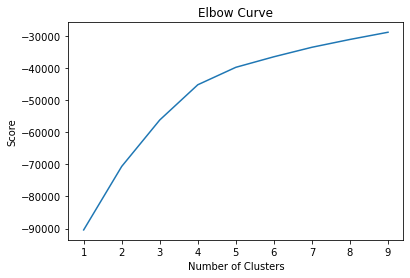

In [34]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Decision on Number of Clusters
The graph shows and incline until 5 clusters, after that the curve flattens out. </br>
Therefore, I will start with 5 clusters, if this turns out to be problematical I will go down to 4 clusters.

## 4. K-means Clustering<a class="anchor" id="4"></a>

In [35]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [36]:
# Fitting the k-means object to the data.

kmeans.fit(df_new)

KMeans(n_clusters=5)

In [37]:
df_new['clusters'] = kmeans.fit_predict(df_new)

In [38]:
df_new.head()

,w_ace_pct,w_1st_pct,l_2ndS_WinPct,l_1st_pct,Sets_played,w_1stS_WinPct,l_1stS_WinPct,w_bpSavedPct,l_PpSgm,w_2ndS_WinPct,l_bpSavedPct,winner_ht,loser_ht,l_ace_pct,w_PpSgm,clusters
0,0.015873,0.603175,0.406250,0.542857,2,0.763158,0.842105,0.000000,7.000000,0.680000,0.714286,1.78,1.90,0.114286,5.727273,3
1,0.134615,0.596154,0.333333,0.790698,2,0.741935,0.441176,1.000000,6.142857,0.619048,0.166667,1.80,1.83,0.023256,7.428571,1
2,0.210526,0.684211,0.500000,0.702128,2,0.794872,0.545455,1.000000,5.875000,0.444444,0.333333,1.75,1.75,0.042553,7.125000,1
3,0.082192,0.561644,0.333333,0.486842,2,0.682927,0.702703,0.727273,7.600000,0.468750,0.538462,1.88,1.85,0.039474,8.111111,1
5,0.208333,0.437500,0.375000,0.563636,2,0.809524,0.741935,0.500000,5.500000,0.703704,0.200000,1.93,1.80,0.018182,5.333333,2


In [39]:
df_new['clusters'].value_counts()

0    11371
2    11301
3     9036
1     8708
4     4522
Name: clusters, dtype: int64

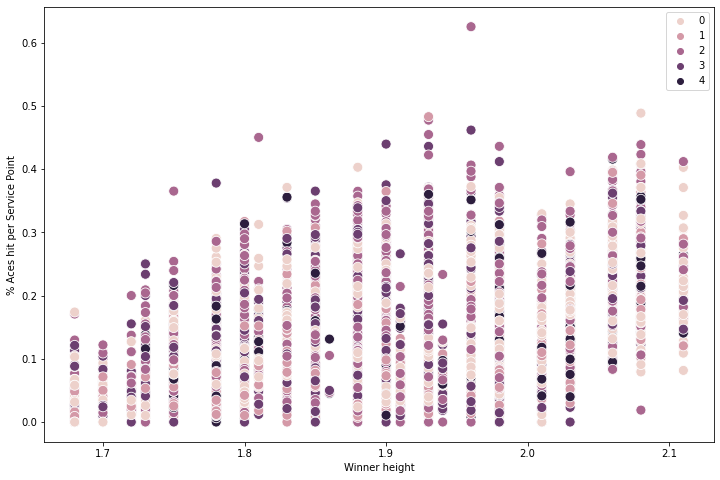

In [40]:
# Plotting the clusters for the "winner_ht" and "w_ace_pct" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['winner_ht'], y=df_new['w_ace_pct'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Winner height') # Label x-axis.
plt.ylabel('% Aces hit per Service Point') # Label y-axis.
plt.show()

The graph does not show any relation with respect to the clusters, however it still indicates that taller players have a higher percentage in hitting aces than smaller players.

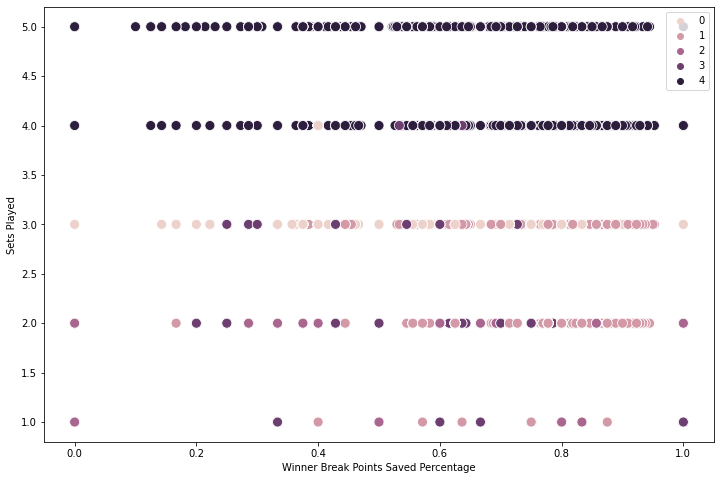

In [41]:
# Plotting the clusters for the "minutes" and "Sets_played" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['w_bpSavedPct'], y=df_new['Sets_played'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Winner Break Points Saved Percentage') # Label x-axis.
plt.ylabel('Sets Played') # Label y-axis.
plt.show()

Here the cluster shows its first trend the clusters number 2 and 3 are mainly in the lower area of break points saved (0-0.4) and sets played (1-2). The cluster number 0 is mainly spread on the amount of 3 sets played, while the cluster number 4 is spreach among 4 and 5 sets played. The cluster 1 ist in the higher break points saved percentage area (0.6-1) and 2 to 3 sets played. <br>
This makes sense as the winner will mist likely have gotten broken on fewer occasions than the loser, this is represented by a high number of break points saved. <br>
It would be interesting to see if those matches are best of 3 and best of 5 matches with straight set wins.

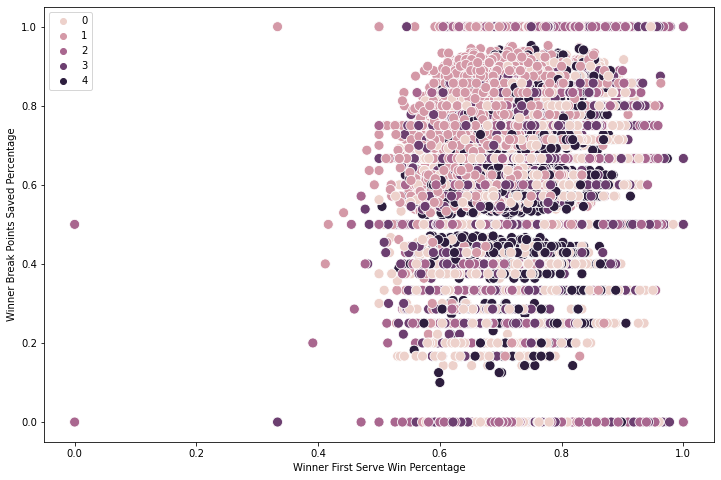

In [42]:
# Plotting the clusters for the "w_1stS_WinPct" and "w_bpSavedPct" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['w_1stS_WinPct'], y=df_new['w_bpSavedPct'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Winner First Serve Win Percentage') # Label x-axis.
plt.ylabel('Winner Break Points Saved Percentage') # Label y-axis.
plt.show()

The cluster for this scatterplot is very mixed again, while cluster number 1 can mainly be visually allocated in the area of the winners break points saved 60%+ and a first serve winpercentage of 50%+ all other clusters seem to be spread all over the graph area.

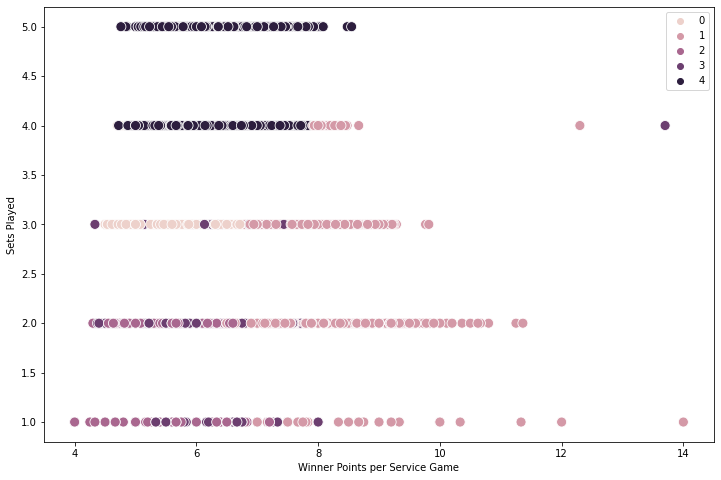

In [43]:
# Plotting the clusters for the "w_PpSgm" and "Sets_played" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['w_PpSgm'], y=df_new['Sets_played'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Winner Points per Service Game') # Label x-axis.
plt.ylabel('Sets Played') # Label y-axis.
plt.show()

This graph shows the best match for the clustering. <br>
Clusters 2 and 3 have 1-2 Sets played and a lower number of points per service game. <br>
Cluster 0 is on the 3 sets played line in the graph with a lower average of points played per service game (4-7) <br>
Cluster 4 is mainly on the 4 and 5 sets played line with up to 8 poin ts played per service game. <br>
Cluster 1 is on takes most points on the right side of the graph indicating a higher average of points played per service game.<br>
<br>
Another insight of this graph is, that the cluster might have been influenced by the magnitude of the average points played per service game as well as sets played because they are the biggest numbers in the data used for the analysis.
All others (except for the players height) have been converted to percent and have a max value of 1 <br>
<br>




In [44]:
df_new.loc[df_new['clusters'] == 4, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 3, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'light purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'dark pink'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
df_new.groupby('cluster').agg({'winner_ht':[ 'mean', 'median'],
            'loser_ht':['mean', 'median'],
            'w_2ndS_WinPct':['mean', 'median'], 
            'w_PpSgm':['mean', 'median'], 
            'l_1stS_WinPct':['mean', 'median'],
            'l_2ndS_WinPct':['mean', 'median'],
            'w_1st_pct':['mean', 'median'],
            'l_1st_pct':['mean', 'median'],
            'w_1stS_WinPct':['mean', 'median'],
            'l_PpSgm':['mean', 'median'],
            'l_ace_pct':['mean', 'median'],
            'Sets_played':['mean', 'median'],
            'w_bpSavedPct':['mean', 'median'],
            'w_ace_pct':['mean', 'median'],
            'l_bpSavedPct':['mean', 'median']           
           })

winner_ht         loser_ht        w_2ndS_WinPct            \
                  mean median      mean median          mean    median   
cluster                                                                  
dark pink     1.855518   1.85  1.853036   1.85      0.514474  0.514286   
dark purple   1.862952   1.85  1.859361   1.85      0.536988  0.534884   
light purple  1.863198   1.85  1.856236   1.85      0.585162  0.586207   
pink          1.866911   1.85  1.860538   1.85      0.556969  0.555556   
purple        1.856313   1.85  1.854052   1.85      0.563592  0.562500   

               w_PpSgm           l_1stS_WinPct           l_2ndS_WinPct  \
                  mean    median          mean    median          mean   
cluster                                                                  
dark pink     7.346993  7.222222      0.663071  0.666667      0.459282   
dark purple   6.273882  6.240000      0.687296  0.686047      0.479618   
light purple  5.870394  5.888889      0.641403  0.645161      0.435208   
pink          5.980453  6.000000      0.684691  0.687500      0.477709   
purple        6.164143  6.181818      0.634844  0.637931      0.432732   

                       w_1st_pct           l_1st_pct           w_1stS_WinPct  \
                median      mean    median      mean    median          mean   
cluster                                                                        
dark pink     0.461538  0.607878  0.607536  0.597490  0.600000      0.719003   
dark purple   0.477612  0.616621  0.617188  0.605469  0.605569      0.743581   
light purple  0.437500  0.618918  0.618421  0.593976  0.596154      0.783611   
pink          0.478261  0.617868  0.619048  0.604163  0.603960      0.760698   
purple        0.435897  0.616109  0.616279  0.593826  0.593220      0.763974   

                         l_PpSgm           l_ace_pct           Sets_played  \
                median      mean    median      mean    median        mean   
cluster                                                                      
dark pink     0.717949  6.560825  6.571429  0.058057  0.047619    2.434428   
dark purple   0.744315  6.561251  6.526316  0.068930  0.059322    4.396948   
light purple  0.785714  6.092188  6.111111  0.057659  0.046875    1.992213   
pink          0.763636  6.238291  6.266667  0.068689  0.058140    3.009410   
purple        0.764706  7.713403  7.571429  0.050920  0.042857    2.336543   

                    w_bpSavedPct           w_ace_pct           l_bpSavedPct  \
             median         mean    median      mean    median         mean   
cluster                                                                       
dark pink       2.0     0.778555  0.789474  0.070129  0.058824     0.503315   
dark purple     4.0     0.623561  0.642857  0.086442  0.075630     0.559794   
light purple    2.0     0.672339  0.750000  0.095211  0.083333     0.411139   
pink            3.0     0.595991  0.625000  0.092184  0.080460     0.496645   
purple          2.0     0.641752  0.666667  0.085784  0.072727     0.638694   

                        
                median  
cluster                 
dark pink     0.500000  
dark purple   0.571429  
light purple  0.428571  
pink          0.500000  
purple        0.647059

This analysis of mean and median shows that most values over all groups are very close to each other.
It's tough to draw a conclusion from this. But this could also indicate that the results are not just driven by those numbers, but maybe other factors that cannot be derived from this data  need to be considered as well.

For further analysis the following points could be considered:
<ul>
    <li> dropping the average points per service game </li>
    <li> splitting the winner's and loser's data </li>
    <li> exploring different ways on how to find a relation between winners and losers data</li>
    <li> splitting best of 3 and best of 5 matches into different subsets and comparing them later on to see if there a significant changes in longer matches (influencing the number of sets played variable)</li> 
    <li> Exploring individual players results for when they win and when they lose</li>
    <li> Exploring how the surface influences results</li>
    
</ul>